# Exploring AirBnB in Athens

> *student name:* **Odysseas Spyropoulos**

* Let's start with importing the essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* After downloading the datasets from http://insideairbnb.com/get-the-data.html.<br />
* We will use the ones containing the summary, as the bigger ones have lots of useless information.<br/>

* Firstly, we will need the `listings` and the `calendar`

In [2]:
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')

* Let's check the data first !

## Data cleansing


In [3]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,144,1,42,2023-09-10,0.28,7,359,8,00000957568
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,70,1,66,2023-07-01,0.49,7,74,3,00001070920
2,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,85,1,92,2023-07-07,0.69,7,52,5,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,60,1,30,2023-06-02,0.19,7,73,1,00000957422
4,27262,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989240,23.765000,Entire home/apt,85,1,21,2023-06-02,0.16,7,90,2,00000957579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950,983937080532919737,Condo in Athina · ★New · 2 bedrooms · 2 beds ·...,70297345,Stavros,NaN,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,37.992828,23.726859,Entire home/apt,46,1,0,NaN,NaN,10,267,0,00002313840
12951,984280014002068815,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,155,1,0,NaN,NaN,3,331,0,00001191888
12952,984280014714317399,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,162,1,0,NaN,NaN,3,345,0,00002123997
12953,984280015206592938,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,169,1,0,NaN,NaN,3,351,0,00001191888


`listings`: offers comprehensive information about AirBnB property listings, including their `id`, `host_id`, `price`, and other relevant features.

In [4]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180
...,...,...,...,...,...,...,...
4728224,984289252638695828,2024-09-15,t,$18.00,$18.00,1,365
4728225,984289252638695828,2024-09-16,t,$16.00,$16.00,1,365
4728226,984289252638695828,2024-09-17,t,$16.00,$16.00,1,365
4728227,984289252638695828,2024-09-18,t,$16.00,$16.00,1,365


`calendar`: provides information about the availability, pricing, and related details of Airbnb listings for various dates.

* Firstly, we need to **cinfigure our `calendar` data**.
* We will make each `date`, a `datetime` object 
* We see that prices contain `$` symbol, we will remove it, making them numeric (`float`), to apply our functions

In [5]:
# Convert the 'date' column to a datetime data type
calendar['date'] = pd.to_datetime(calendar['date'])

# Remove the dollar signs from the 'price' and 'adjusted_price' columns
# and convert them to float data type
calendar['price'] = calendar['price'].str.replace('[\$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('[\$,]', '', regex=True).astype(float)

In [6]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,150.0,60.0,1,180
1,10595,2023-09-22,t,150.0,60.0,1,180
2,10595,2023-09-23,t,150.0,75.0,1,180
3,10595,2023-09-24,t,150.0,90.0,1,180
4,10595,2023-09-25,f,300.0,210.0,1,180
...,...,...,...,...,...,...,...
4728224,984289252638695828,2024-09-15,t,18.0,18.0,1,365
4728225,984289252638695828,2024-09-16,t,16.0,16.0,1,365
4728226,984289252638695828,2024-09-17,t,16.0,16.0,1,365
4728227,984289252638695828,2024-09-18,t,16.0,16.0,1,365


* Perfect!
* Now let's check for **outliers**.

In [7]:
calendar.describe()

,listing_id,date,price,adjusted_price,minimum_nights,maximum_nights
count,4.728229e+06,4728229,4.728229e+06,4.728229e+06,4.728229e+06,4.728229e+06
mean,3.450809e+17,2024-03-21 00:01:00.064095744,1.418523e+02,1.384286e+02,3.450921e+00,7.988898e+02
min,1.059500e+04,2023-09-21 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.031469e+07,2023-12-21 00:00:00,5.000000e+01,5.000000e+01,1.000000e+00,3.650000e+02
50%,5.096457e+07,2024-03-21 00:00:00,7.100000e+01,7.100000e+01,2.000000e+00,1.125000e+03
75%,7.824274e+17,2024-06-20 00:00:00,1.170000e+02,1.150000e+02,2.000000e+00,1.125000e+03
max,9.842893e+17,2024-09-19 00:00:00,8.514000e+04,8.514000e+04,8.000000e+02,4.444000e+03
std,4.025185e+17,NaN,7.994942e+02,7.448263e+02,1.851076e+01,4.360061e+02


* There is something wrong with `price`...
* The **max** is way above the **mean**

In [8]:
calendar.groupby('listing_id')['price'].max().sort_values(ascending=False).head(133)

listing_id
32463338              85140.0
41520088               9999.0
31820135               8090.0
587444906842088377     8000.0
12612983               8000.0
                       ...   
40878740               8000.0
572568549071124180     6075.0
35046899               5355.0
20806292               5065.0
917104197751120765     5000.0
Name: price, Length: 133, dtype: float64

* After some testing, we chose `head(133)` to show the 130 outliers in `price`
* Before choosing where to start the clearing, let's check our `listings`

In [9]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.295500e+04,1.295500e+04,0.0,12955.000000,12955.000000,12955.000000,12955.000000,12955.000000,10999.000000,12955.000000,12955.000000,12955.000000
mean,3.450556e+17,2.074291e+08,NaN,37.980257,23.731754,110.458587,3.164801,48.674489,1.795771,12.039753,224.680587,13.735701
std,4.025301e+17,1.679894e+08,NaN,0.013459,0.012458,738.185656,16.638611,83.281705,1.780333,19.172056,128.189144,19.792624
min,1.059500e+04,1.805000e+03,NaN,37.950322,23.697700,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.031469e+07,5.521472e+07,NaN,37.969175,23.723995,50.000000,1.000000,2.000000,0.460000,1.000000,104.000000,0.000000
50%,5.096457e+07,1.748825e+08,NaN,37.978630,23.729735,71.000000,2.000000,13.000000,1.180000,4.000000,270.000000,5.000000
75%,7.823914e+17,3.426869e+08,NaN,37.988395,23.737750,113.000000,2.000000,56.000000,2.620000,14.000000,337.000000,19.000000
max,9.842893e+17,5.375438e+08,NaN,38.030830,23.780220,80275.000000,800.000000,865.000000,15.500000,114.000000,365.000000,206.000000


* Same problem with `price`
* Same approach

In [10]:
listings.groupby('id')['price'].max().sort_values(ascending=False).head(20)

id
32463338              80275
51341771               8000
21106510               8000
559861564727237713     8000
29173172               8000
29363635               8000
51257107               8000
51342328               8000
14757686               5000
26068002               4849
42608079               3051
47138356               2500
39476638               2000
41556060               1980
807721368332995934     1702
28042027               1649
672293681430475973     1500
22462133               1500
51421032               1463
51282041               1445
Name: price, dtype: int64

* If we compare the **max** prices from `calendar` and `listings`, we see that we can exclude every listing above 5k
    * The most expensive, which costs 80k per night... but it is not [the most expensive hotel suite in the world](https://www.travelandleisure.com/hotels-resorts/luxury-hotels/worlds-most-expensive-hotel-suite)
    * The AirBnBs which cost **exactly** 8k, seems weird...
    * All the other in between 8k and 5k, for uniformity
* It's logical for `listings` to have way more outliers, as `calendar` shows newer, filtered data, whereas `listings` shows every listing posted in AirBnB

* Let's filter out!

In [11]:
calendar = calendar[calendar['price'] <= 5000] 
listings = listings[listings['price'] <= 5000]

In [12]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,150.0,60.0,1,180
1,10595,2023-09-22,t,150.0,60.0,1,180
2,10595,2023-09-23,t,150.0,75.0,1,180
3,10595,2023-09-24,t,150.0,90.0,1,180
4,10595,2023-09-25,f,300.0,210.0,1,180
...,...,...,...,...,...,...,...
4728224,984289252638695828,2024-09-15,t,18.0,18.0,1,365
4728225,984289252638695828,2024-09-16,t,16.0,16.0,1,365
4728226,984289252638695828,2024-09-17,t,16.0,16.0,1,365
4728227,984289252638695828,2024-09-18,t,16.0,16.0,1,365


In [13]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,144,1,42,2023-09-10,0.28,7,359,8,00000957568
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,70,1,66,2023-07-01,0.49,7,74,3,00001070920
2,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,85,1,92,2023-07-07,0.69,7,52,5,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,60,1,30,2023-06-02,0.19,7,73,1,00000957422
4,27262,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989240,23.765000,Entire home/apt,85,1,21,2023-06-02,0.16,7,90,2,00000957579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950,983937080532919737,Condo in Athina · ★New · 2 bedrooms · 2 beds ·...,70297345,Stavros,NaN,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,37.992828,23.726859,Entire home/apt,46,1,0,NaN,NaN,10,267,0,00002313840
12951,984280014002068815,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,155,1,0,NaN,NaN,3,331,0,00001191888
12952,984280014714317399,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,162,1,0,NaN,NaN,3,345,0,00002123997
12953,984280015206592938,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,169,1,0,NaN,NaN,3,351,0,00001191888


In [14]:
calendar['price'].max() 

5000.0

In [15]:
listings['price'].max()  

5000

* Now the data seems better!
* We move on to the requests

## 1. Neighbourhood Listings in Descending Order
*Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).*

* Let's `groupby()` neighbourhood
* On the returned object, we will count the listings *(rows)* with `size()`
* We will convert it to `DataFrame`, with `to_frame()`

* We assume that the popularity of each neighbourhood can be measured by the `totl_listings` that it has
* When AirBnB supply is up, it often indicates an increased demand, signifying a **well-known neighborhood.**

In [16]:
listings_per_nei = listings.groupby('neighbourhood').size().to_frame()

# Rename the column to 'total_listings' for clarity
listings_per_nei.columns = ['total_listings']

# Sort the DataFrame in descending order based on the 'total_listings'
listings_per_nei.sort_values(by='total_listings', ascending=False)

,total_listings
neighbourhood,
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2415
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
ΝΕΟΣ ΚΟΣΜΟΣ,980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,978
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
ΠΑΓΚΡΑΤΙ,511
ΑΜΠΕΛΟΚΗΠΟΙ,452
ΚΟΛΩΝΑΚΙ,425


* Although some neighbourhoods (`ΠΕΝΤΑΓΩΝΟ`, `ΡΗΓΙΛΛΗΣ`) have very few listings in comparison, we have chosen not to merge them due to the manageable dataset size

## 2. Neighbourhood Prices in Descending Order
*Create a table with the prices per neighbourhood. The contents of the table should be in descending median prices*

* We will create a new `DataFrame`, `nei_prices`, which takes the `price` column from grouped by `Neighbourhood` data
* To perform various aggregation functions (`mean()`, `median()`, `std()`, `count()`) we use `agg()`.
* Finally, we will use `reset_index()` to assign a numerical index to `Neighborhood` instead of their names 

* The contents of the table will be shown in **descending median prices.**

In [17]:
nei_prices = listings.groupby('neighbourhood')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()

# Rename the columns for clarity
nei_prices.columns = ['Neighborhood', 'Mean Price', 'Median Price', 'Standard Deviation', 'Total Listings']

# Sort the neighborhoods by mean price in descending order
nei_prices.sort_values(by='Median Price', ascending=False)

,Neighborhood,Mean Price,Median Price,Standard Deviation,Total Listings
39,ΡΗΓΙΛΛΗΣ,367.800000,120.0,578.622675,5
16,ΖΑΠΠΕΙΟ,175.468750,114.0,176.111276,160
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,137.396273,104.0,164.158588,2415
5,ΑΚΡΟΠΟΛΗ,134.211488,100.0,128.169389,383
21,ΚΟΛΩΝΑΚΙ,128.595294,100.0,104.431349,425
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,120.284314,90.5,104.613533,1122
17,ΘΗΣΕΙΟ,126.492228,90.0,124.176775,386
19,ΚΕΡΑΜΕΙΚΟΣ,123.883382,89.0,136.367487,343
25,ΛΥΚΑΒΗΤΤΟΣ,104.561728,75.0,87.859850,162
10,ΓΚΑΖΙ,95.792453,70.5,75.355882,106


## 3. Availability per Day
*Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.*

* We now move on, from neighbourhoods, to daily activity!
* So let's examine the `calendar` `Dataframe`
* We will deactivate and activate the rows limit, so we can see the data for each of the 365 days of the year

In [18]:
pd.set_option("display.max_rows", None)
calendar.head(366)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,150.0,60.0,1,180
1,10595,2023-09-22,t,150.0,60.0,1,180
2,10595,2023-09-23,t,150.0,75.0,1,180
3,10595,2023-09-24,t,150.0,90.0,1,180
4,10595,2023-09-25,f,300.0,210.0,1,180
5,10595,2023-09-26,f,300.0,240.0,1,180
6,10595,2023-09-27,f,300.0,270.0,1,180
7,10595,2023-09-28,f,300.0,300.0,1,180
8,10595,2023-09-29,f,300.0,300.0,1,180
9,10595,2023-09-30,t,150.0,150.0,1,180


In [19]:
pd.reset_option('display.max_rows')

After checking every day of a year from `calendar`, we assume the following:
* `available`: `f` if booked, `t` if not
* `price`: the **base nightly rental price**, for a listing, on a specific date
* `adjusted_price`: the **adjusted *or* final price**, for a stay, on a specific date<br />
    *( It can include additional costs or discounts that are applied to the base price )*

Notes:
* An available listing doesn't necessarily mean that the `price` and `adjusted_price` will be the same

* On the listings that are available (`available == t`).
* We will `groupby()` date, in order to count the **availability per day**.
* We use again the aggregation function `size()` on each day.
* Finally, again, we will use `reset_index()` for numerical indexing.

In [20]:
daily = calendar[calendar['available'] == 't'].groupby('date').size().reset_index()

# Again, renaming the columns for clarity
daily.columns = ['Date', 'Total Listings']

# it should be 365
len(daily)

365

In [21]:
daily

,Date,Total Listings
0,2023-09-21,540
1,2023-09-22,982
2,2023-09-23,1475
3,2023-09-24,2495
4,2023-09-25,3194
...,...,...
360,2024-09-15,7532
361,2024-09-16,7535
362,2024-09-17,7532
363,2024-09-18,7537


* We choose the basic **line plot** to visualize our data
* We will generate a sequence of dates, from September 21, 2023 to September 19, 2024, with a default daily frequency.
* We will show the variation in the number of listings available, in a year

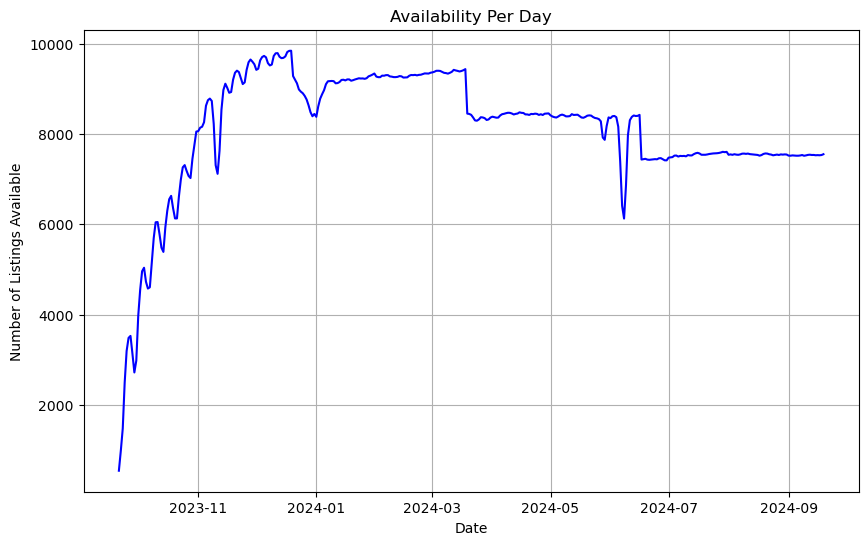

In [22]:
# peaking dates
dates = pd.date_range(start='2023-09-21', end='2024-09-19')

# Create a line plot
plt.figure(figsize=(10,6))

# Have a continuous line
plt.plot(dates, daily['Total Listings'], linestyle='-', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Listings Available')
plt.title('Availability Per Day')

# Add grid
plt.grid(True)

plt.show()

We observe that:
* There are some weird ups and downs at the beginning
    * With some data checking, we assume it's due to increasing demand during the end of the week
* The further we move into the future, from September (2023-11) to January (2024-01), there are less AirBnBs booked
* Many listings are booked for early June... famous greek summer.

## 4. Reviews, Occupacy per Listing, Average Income

### ( i ) Number of reviews, per listing
*Create a histogram showing the number of reviews per listing.*

* We will now use the `reviews` dataset
* We will convert the `date` column to datetime64 object, in case we need it

In [23]:
reviews = pd.read_csv('reviews.csv', parse_dates=['date'])
reviews.date

0        2011-05-20
1        2012-08-15
2        2013-05-20
3        2014-05-04
4        2014-09-13
            ...    
630573   2023-09-13
630574   2023-09-16
630575   2023-09-15
630576   2023-09-20
630577   2023-09-18
Name: date, Length: 630578, dtype: datetime64[ns]

In [24]:
reviews

,listing_id,date
0,10595,2011-05-20
1,10595,2012-08-15
2,10595,2013-05-20
3,10595,2014-05-04
4,10595,2014-09-13
...,...,...
630573,975966554881091774,2023-09-13
630574,976076532701121190,2023-09-16
630575,977373669051180593,2023-09-15
630576,977373669051180593,2023-09-20


`reviews`:  contains information about Airbnb listing reviews, including the `listing_id` and the `date` of each review.

* We will group the reviews by the `listing_id`
* The rest follows as previous `groupy()`s

In [25]:
reviews_per_list = reviews.groupby('listing_id').size().reset_index()

reviews_per_list.columns = ['listing_id', 'total_reviews']

reviews_per_list

,listing_id,total_reviews
0,10595,42
1,10990,66
2,10993,92
3,10995,30
4,27262,21
...,...,...
10994,975413215364080586,4
10995,975966554881091774,1
10996,976076532701121190,1
10997,977373669051180593,2


* We wiil now create the requested **histogram**.
* We will create bin edges, from `min()` reviews, to `max()`, but rounded up to the closest hunded, with `round(...max(), -2)`

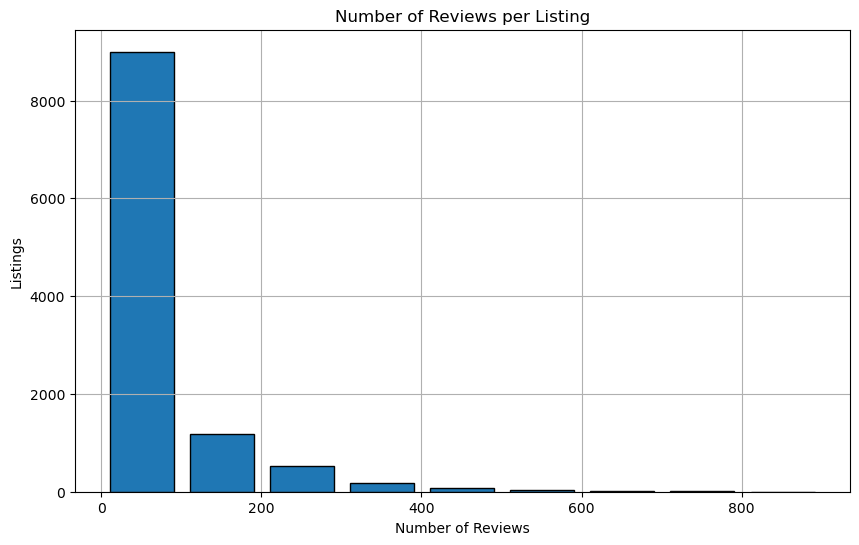

In [26]:
# Find the smallest and maximum number of reviews
min_reviews = reviews_per_list['total_reviews'].min()

# Round it up to the nearest hundred
# max() = 865 -> 900
max_reviews = round(reviews_per_list['total_reviews'].max(), -2)

# Βin edges to cover the range from min to max_reviews
# max_reviews+100, to include those over 800
bin_edges = range(min_reviews, max_reviews+100, 100)

# Create a histogram
plt.figure(figsize=(10, 6))

# rwidth=0.8, to make the bars appear in between the intervals
plt.hist(reviews_per_list['total_reviews'], bins=bin_edges, edgecolor='black', rwidth=0.8)

# As before
plt.xlabel('Number of Reviews')
plt.ylabel('Listings')
plt.title('Number of Reviews per Listing')
plt.grid()
plt.show()

* The graph shows clearly that the majority of listings have **between 0 and 100 reviews**.
* It is not clearly shown, but there are 2 listings that have over 800 reviews

### ( ii ) Average occupacy, per listing, per month
*Calculate the average occupacy per listing per month.*

* We continue with the `reviews` dataset.
* Let's check it again, this time to see how the reviews are spread out for the first listing

In [27]:
reviews.head(60)

,listing_id,date
0,10595,2011-05-20
1,10595,2012-08-15
2,10595,2013-05-20
3,10595,2014-05-04
4,10595,2014-09-13
5,10595,2015-04-25
6,10595,2015-05-17
7,10595,2015-05-25
8,10595,2015-09-23
9,10595,2015-12-29


* To calculate the *average occupacy per listing*, we can take whatever timespan we want 
* It makes sense to use the last 12 months of data, from `2022-09-21` to `2023-09-21`

In [28]:
reviews_12m = reviews[(reviews['date']>"2022-09-21") & (reviews['date']<"2023-09-21")]
reviews_12m

,listing_id,date
34,10595,2023-01-21
35,10595,2023-02-03
36,10595,2023-02-15
37,10595,2023-02-17
38,10595,2023-03-17
...,...,...
630573,975966554881091774,2023-09-13
630574,976076532701121190,2023-09-16
630575,977373669051180593,2023-09-15
630576,977373669051180593,2023-09-20


* We will `groupby()` them by `listing_id`
* We will divide by $6$ (`/6`) to find the **average monthly occupacy**.
    * We divide by $12$ (months), to find the average monthly reviews
    * And after we multiply by $2$, because we assume that *half of the bookings result in reviews.*
    
Note:
* The average reviews that we found are different from the `reviews_per_month` in `listings`, as we choose a much smaller timespan

In [29]:
avg_occ = reviews_12m.groupby('listing_id').size()/6

# AS before
avg_occ = avg_occ.to_frame()
avg_occ.columns = ['avg_occupacy']
avg_occ

,avg_occupacy
listing_id,
10595,1.333333
10990,0.500000
10993,0.833333
10995,0.166667
27262,0.333333
...,...
975413215364080586,0.666667
975966554881091774,0.166667
976076532701121190,0.166667


* This is the average occupacy, the number of bookings, for each listing from 2022-09-21 to 2023-09-21

### ( iii ) Average income

* *Assuming that each booking is for a three nights stay*, we will multiply the `avg_occupacy` by $3$

In [30]:
avg_stay = avg_occ*3
avg_stay

,avg_occupacy
listing_id,
10595,4.0
10990,1.5
10993,2.5
10995,0.5
27262,1.0
...,...
975413215364080586,2.0
975966554881091774,0.5
976076532701121190,0.5


* We will use the average price charged throughout all listings

In [31]:
avg_price = listings.price.mean()
avg_price

100.00123580752297

* So, the average income for the last 12 months equals:

In [32]:
avg_income = avg_stay * avg_price

avg_income.columns = ['avg_income']
avg_income

,avg_income
listing_id,
10595,400.004943
10990,150.001854
10993,250.003090
10995,50.000618
27262,100.001236
...,...
975413215364080586,200.002472
975966554881091774,50.000618
976076532701121190,50.000618


* This was the average income for each listing
* It makes more sense to calculate also for each host

* We will extract rows from `listings` where the `id` of match the `listing_id` of `avg_income` `DataFrame`.
* Afterwards we sort them in ascending order by their `id`, so we can merge them with `avg_income`.

In [33]:
ls = listings[listings['id'].isin(avg_income.index)].sort_values(by='id')
ls.host_id

0            37177
1            37177
2            37177
3            37177
4            37177
           ...    
12825    460666467
12840    389089363
12841    536155130
12849    536411211
12890    177034096
Name: host_id, Length: 9573, dtype: int64

* We need to `reset_index()` to not mess up where each `host_id` goes

In [34]:
avg_income = avg_income.reset_index()
avg_income['host_id'] = ls['host_id']
avg_income

,listing_id,avg_income,host_id
0,10595,400.004943,37177.0
1,10990,150.001854,37177.0
2,10993,250.003090,37177.0
3,10995,50.000618,37177.0
4,27262,100.001236,37177.0
...,...,...,...
9568,975413215364080586,200.002472,488213362.0
9569,975966554881091774,50.000618,488213362.0
9570,976076532701121190,50.000618,474672647.0
9571,977373669051180593,100.001236,488213362.0


* We will `groupby()` host, to find the **average income per host**.

In [35]:
avg_income.groupby('host_id')['avg_income'].sum().to_frame()

,avg_income
host_id,
1805.0,500.006179
37177.0,2000.024716
70840.0,100.001236
109363.0,50.000618
121318.0,700.008651
...,...
512584726.0,750.009269
512671449.0,5350.066116
512770001.0,1600.019773


## 5. Listings per Room Type
*Show the number of listings per room type, in absolute numbers, and also in percentages.*</br>
*Then, show the number of listings per neighrbourhood and room type.*

* We return to `listings` dataset

In [36]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,144,1,42,2023-09-10,0.28,7,359,8,00000957568
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,70,1,66,2023-07-01,0.49,7,74,3,00001070920
2,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,85,1,92,2023-07-07,0.69,7,52,5,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,60,1,30,2023-06-02,0.19,7,73,1,00000957422
4,27262,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989240,23.765000,Entire home/apt,85,1,21,2023-06-02,0.16,7,90,2,00000957579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950,983937080532919737,Condo in Athina · ★New · 2 bedrooms · 2 beds ·...,70297345,Stavros,NaN,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,37.992828,23.726859,Entire home/apt,46,1,0,NaN,NaN,10,267,0,00002313840
12951,984280014002068815,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,155,1,0,NaN,NaN,3,331,0,00001191888
12952,984280014714317399,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,162,1,0,NaN,NaN,3,345,0,00002123997
12953,984280015206592938,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,169,1,0,NaN,NaN,3,351,0,00001191888


* Now we will `groupby()` the type of the room
* The procedure is the same
* First we will show **the number of listings, in absolute numbers**

In [37]:
room_type_count_abs = listings.groupby('room_type').size().to_frame()
room_type_count_abs.columns = ['total_listings']
room_type_count_abs

,total_listings
room_type,
Entire home/apt,11646
Hotel room,104
Private room,1112
Shared room,85


* Afterwards, in **percentages**.
* Which is the `total_listings`, divided by the total number of listings (`sum()`), multiplied by 100

In [38]:
room_type_count_per = (room_type_count_abs / room_type_count_abs.sum()) * 100
room_type_count_per.columns = ['total_listings (%)']
room_type_count_per

,total_listings (%)
room_type,
Entire home/apt,89.951340
Hotel room,0.803275
Private room,8.588862
Shared room,0.656523


* And the **visual representation (with percentages)**

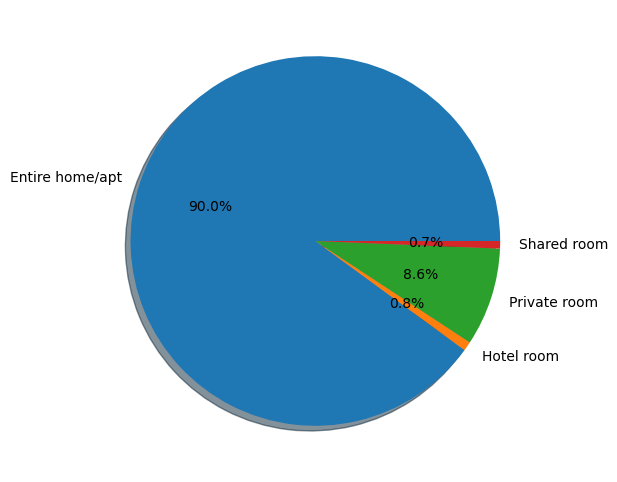

In [39]:
plt.figure(figsize=(10, 6))

plt.pie(room_type_count_per['total_listings (%)'], labels=room_type_count_per.index, autopct='%1.1f%%',
        shadow=True)

plt.show()

* Finally, we will show the number of listings **per neighbourhood and per room type**.
* We just `groupby()` both of them

In [40]:
list_per_nei_per_type = listings.groupby(['neighbourhood', 'room_type']).size().to_frame()
list_per_nei_per_type.columns = ['total_listings']
list_per_nei_per_type

total_listings
neighbourhood                    room_type                      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                   Entire home/apt              55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                 Entire home/apt              33
                                 Private room                  5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ Entire home/apt             686
                                 Hotel room                    4
...                                                          ...
ΣΤΑΔΙΟ                           Private room                 10
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                  Entire home/apt              73
                                 Hotel room                    4
                                 Private room                  4
                                 Shared room                   4

[111 rows x 1 columns]

## 6. Prices per Day
*Create a table with the average price per listing per day. Draw a graph visualizing the table.*

* Because we want daily data, we have to choose between `calendar` and `reviews`.
* We will work with `calendar` because it has `price` and `adjusted_price` columns.

In [41]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,150.0,60.0,1,180
1,10595,2023-09-22,t,150.0,60.0,1,180
2,10595,2023-09-23,t,150.0,75.0,1,180
3,10595,2023-09-24,t,150.0,90.0,1,180
4,10595,2023-09-25,f,300.0,210.0,1,180
...,...,...,...,...,...,...,...
4728224,984289252638695828,2024-09-15,t,18.0,18.0,1,365
4728225,984289252638695828,2024-09-16,t,16.0,16.0,1,365
4728226,984289252638695828,2024-09-17,t,16.0,16.0,1,365
4728227,984289252638695828,2024-09-18,t,16.0,16.0,1,365


* We will choose `adjusted_price`, because we want to consider the final prices, after reductions or addtiional costs
* We will calculate the average price, from all the listings, per day

In [42]:
price_per_day = calendar.groupby(['date'])['adjusted_price'].mean().to_frame()
price_per_day.columns = ['price_per_day']
price_per_day

,price_per_day
date,
2023-09-21,99.700525
2023-09-22,102.693651
2023-09-23,103.080102
2023-09-24,100.344122
2023-09-25,99.134559
...,...
2024-09-15,108.658407
2024-09-16,108.139648
2024-09-17,108.120272


* To visualize our data, we will use the line plot, to show the **trend over time**.
* The dates are the same as before, from `2023-09-21`, to `2024-09-19`	
* To keep a visual continuum, we will aply the same style as the *3rd question*.

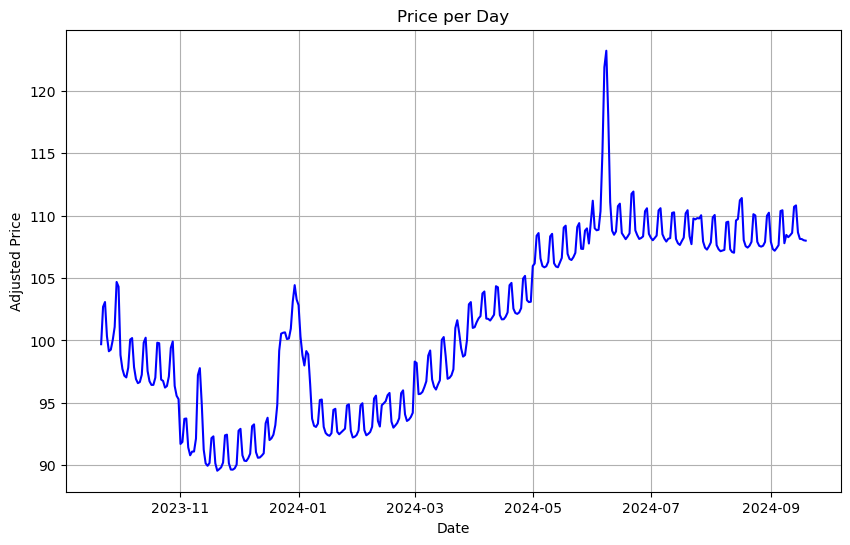

In [43]:
dates = pd.date_range(start='2023-09-21', end='2024-09-19')

plt.figure(figsize=(10, 6))
plt.plot(dates, price_per_day.price_per_day, linestyle='-', color='blue')

plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.title('Price per Day')

plt.grid(True)
plt.show()


## 7. Listings per Host
*Create a table with the number of listings per host, in descending order*</br>
*After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.*

* We return back to `listings`!
* We will `groupby()` host, ans we will count the number of listings that he/she/they has/have.
* We will sort the hosts in descending order, of the `total_listings` that they have.

In [44]:
listings_per_host = listings.groupby('host_id').size().sort_values(ascending=False).reset_index()
listings_per_host.columns = ['host_id', 'total_listings']
listings_per_host

,host_id,total_listings
0,20104194,114
1,113548208,88
2,90390850,78
3,748818,74
4,47267002,61
...,...,...
5768,130646248,1
5769,130612477,1
5770,130551473,1
5771,130465834,1


* This time we will use a line plot again, but **with transprarent markers** (`marker='o', alpha=0.3`)
* So we can add another dimension to our table, **the density**.
* If 2 or more hosts have the same number of listings, we rank them by `host_id`

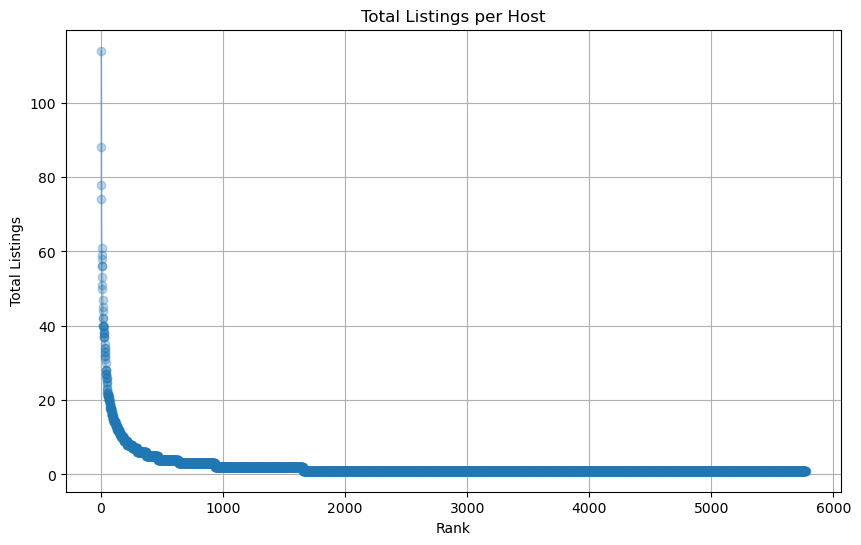

In [45]:
plt.figure(figsize=(10, 6))

# listings_per_host.index + 1, so the ranking starts from 1, instead of 0
plt.plot(listings_per_host.index + 1, listings_per_host['total_listings'], marker='o', alpha=0.3)

plt.xlabel('Rank')
plt.ylabel('Total Listings')
plt.title('Total Listings per Host')

plt.grid(True)
plt.show()


* Now we will show the same plot,but with **logarithmic scale**.

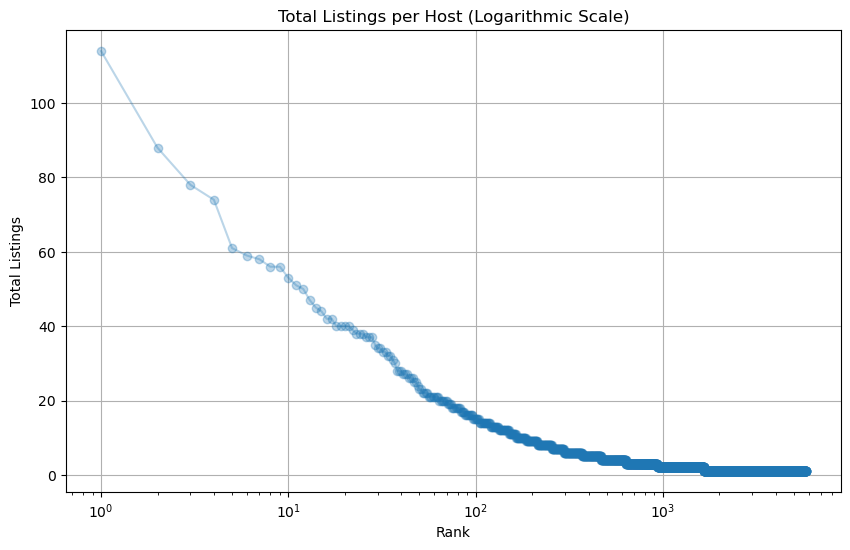

In [46]:
# Create a figure and plot the data
plt.figure(figsize=(10, 6))

plt.plot(listings_per_host.index + 1, listings_per_host['total_listings'], marker='o', alpha=0.3)

# Set the x-axis to a logarithmic scale
plt.xscale('log')

plt.xlabel('Rank')
plt.ylabel('Total Listings')
plt.title('Total Listings per Host (Logarithmic Scale)')

plt.grid(True)
plt.show()

* The numbers on the $x$-axis are in logarithmic scale as well. 

## 8. Visualize Listings
*Draw an interactive map to show the listings ovelayed on Athens.*</br>
*The map should show each listing and on clicking on top of it, the user should see a short description of the listing.*

* First of all, we need to intall `folium` lirary, if we don't have it already

In [47]:
!pip install folium

* Afterwards we will extract from `listings`, only the columns that we need for our markers
* Markers are graphical representations used in maps created with folium
* In our case it will show each **AirBnB**.

In [48]:
ath_markers = listings[['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price']]
ath_markers

,id,neighbourhood,latitude,longitude,room_type,price
0,10595,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,144
1,10990,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,70
2,10993,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,85
3,10995,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,60
4,27262,ΑΜΠΕΛΟΚΗΠΟΙ,37.989240,23.765000,Entire home/apt,85
...,...,...,...,...,...,...
12950,983937080532919737,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,37.992828,23.726859,Entire home/apt,46
12951,984280014002068815,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,155
12952,984280014714317399,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,162
12953,984280015206592938,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,169


* We wil use the [coordinates of athens](https://www.google.com/search?sca_esv=577907868&sxsrf=AM9HkKkTmOvqKJrQkK5AZ8_G-hBbMruIfw:1698694991739&q=What+are+the+coordinates+of+Athens%3F&sa=X&ved=2ahUKEwjGr8H8w56CAxWbSaQEHdufDb0QsZYEegQIFxAC&biw=2048&bih=1063&dpr=1.25#:~:text=37.9838%C2%B0%20N%2C%2023.7275%C2%B0%20E), 37.9838° N, 23.7275° E, for the `location`.
* We limit the maximum zoom level from 12 to 15
* For each marker, we will a short description of the listing (`id`, `neighbourhood`, `room_type`, `price`) when the user clicks on it.

In [49]:
import folium

# Create an interactive map centered around Athens
ath_map = folium.Map(location=[37.9838, 23.7275], zoom_start=12, max_zoom=15, control_scale=True)

# Iterate through the markers and add them to the map
for index, row in ath_markers.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    id = row['id']
    neighbourhood = row['neighbourhood']
    room_type = row['room_type']
    price = row['price']
    
    # Generate the content for the marker's popup
    popup_text = f"<br>ID: {id} \
                    <br>Neighbourhood: {neighbourhood} \
                    <br>Room Type: {room_type} \
                    <br>Price: {price}€"
    
    # Create a CircleMarker with custom properties and add it to the map
    marker = folium.CircleMarker([lat, lon], radius=2, weight=5, opacity=0.4, popup=popup_text)
    marker.add_to(ath_map)
    
# Save the map as an HTML file
ath_map.save('athens_map.html')

* Because the file is too big, we saved it in an ecternal `.html` file named `athens_map.html`.
* Open it in your browser and enjoy Athens 2.0 ❤️